## Prophet

Prophet FB was developed by Facebook as an algorithm for the in-house prediction of time series values for different business applications. Therefore, it is specifically designed for the prediction of business time series.

It is an additive model consisting of four components:

Prophet
Let us discuss the meaning of each component:

g(t): It represents the trend and the objective is to capture the general trend of the series. For example, the number of advertisements views on Facebook is likely to increase over time as more people join the network. But what would be the exact function of increase?
s(t): It is the Seasonality component. The number of advertisement views might also depend on the season. For example, in the Northern hemisphere during the summer months, people are likely to spend more time outdoors and less time in from of their computers. Such seasonal fluctuations can be very different for different business time series. The second component is thus a function that models seasonal trends. 
h(t): The Holidays component. We use the information for holidays which have a clear impact on most business time series. Note that holidays vary between years, countries, etc. and therefore the information needs to be explicitly provided to the model.
The error term εt stands for random fluctuations that cannot be explained by the model. As usual, it is assumed that εt follows a normal distribution N (0, σ2) with zero mean and unknown variance σ that has to be derived from the data.

In [2]:
# This is for the Lima district (Deaths)
# Python
import pandas as pd
from prophet import Prophet
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DSA5900/LIMA_DPT_PVN_DISTRICT.csv')
df

,fecha_resultado,departamento,provincia,distrito,num_death_cases,num_positive_cases
0,2020-03-12,LIMA,LIMA,LIMA,0,1
1,2020-03-14,LIMA,LIMA,LIMA,0,1
2,2020-03-15,LIMA,LIMA,LIMA,0,3
3,2020-03-16,LIMA,LIMA,LIMA,1,1
4,2020-03-17,LIMA,LIMA,LIMA,0,1
...,...,...,...,...,...,...
1111,2023-03-30,LIMA,LIMA,LIMA,1,30
1112,2023-03-31,LIMA,LIMA,LIMA,0,22
1113,2023-04-01,LIMA,LIMA,LIMA,0,27
1114,2023-04-02,LIMA,LIMA,LIMA,1,6


In [5]:
df.describe()

,num_death_cases,num_positive_cases
count,1116.000000,1116.000000
mean,7.770609,156.546595
std,10.837374,295.832083
min,0.000000,0.000000
25%,0.750000,28.000000
50%,2.000000,62.000000
75%,11.000000,186.250000
max,45.000000,2477.000000


In [6]:
print(df['num_death_cases'].unique())
print(df['fecha_resultado'].unique())

[ 0  1  2  3  5  6  4  9 10  7 16 11 13 14 15 19 25 22 17 21 24 20 29 26
 31 27 32 42 33 28 38 34 39 36 37 35 30 45 18 23  8 12 41 40 44 43]
['2020-03-12' '2020-03-14' '2020-03-15' ... '2023-04-01' '2023-04-02'
 '2023-04-03']


In [7]:
df.dtypes

fecha_resultado       object
departamento          object
provincia             object
distrito              object
num_death_cases        int64
num_positive_cases     int64
dtype: object

In [8]:
df['fecha_resultado'] = pd.to_datetime(df['fecha_resultado'], format='%Y/%m/%d')

In [9]:
df['Year'] = df['fecha_resultado'].dt.year
df['Month'] = df['fecha_resultado'].dt.month
df['Day'] = df['fecha_resultado'].dt.day
df['ds'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [10]:
df.head()

,fecha_resultado,departamento,provincia,distrito,num_death_cases,num_positive_cases,Year,Month,Day,ds
0,2020-03-12,LIMA,LIMA,LIMA,0,1,2020,3,12,2020-03-12
1,2020-03-14,LIMA,LIMA,LIMA,0,1,2020,3,14,2020-03-14
2,2020-03-15,LIMA,LIMA,LIMA,0,3,2020,3,15,2020-03-15
3,2020-03-16,LIMA,LIMA,LIMA,1,1,2020,3,16,2020-03-16
4,2020-03-17,LIMA,LIMA,LIMA,0,1,2020,3,17,2020-03-17


In [11]:
df.dtypes

fecha_resultado       datetime64[ns]
departamento                  object
provincia                     object
distrito                      object
num_death_cases                int64
num_positive_cases             int64
Year                           int64
Month                          int64
Day                            int64
ds                    datetime64[ns]
dtype: object

In [12]:
df.drop(['fecha_resultado', 'departamento', 'provincia', 'distrito','num_positive_cases', 'Year', 'Month', 'Day', ], axis=1, inplace= True)
df.columns = ['y', 'ds']

In [13]:
len(df['ds'])

1116

In [14]:
df.head()

,y,ds
0,0,2020-03-12
1,0,2020-03-14
2,0,2020-03-15
3,1,2020-03-16
4,0,2020-03-17


In [15]:
df['y'] = df['y'].cumsum()
df

,y,ds
0,0,2020-03-12
1,0,2020-03-14
2,0,2020-03-15
3,1,2020-03-16
4,1,2020-03-17
...,...,...
1111,8671,2023-03-30
1112,8671,2023-03-31
1113,8671,2023-04-01
1114,8672,2023-04-02


In [16]:
# First 1000 days
df_first_1000 = df.iloc[:1000, :]
df_first_1000
#Train data

,y,ds
0,0,2020-03-12
1,0,2020-03-14
2,0,2020-03-15
3,1,2020-03-16
4,1,2020-03-17
...,...,...
995,8602,2022-12-04
996,8604,2022-12-05
997,8604,2022-12-06
998,8606,2022-12-07


In [35]:
# Fitting the model
m = Prophet(interval_width= 0.95, daily_seasonality = False) # interval_width looks at our confidemce interval
model = m.fit(df_first_1000) # fit the data using fit, similar to other prediction models 
# only 1000 days now

DEBUG:cmdstanpy:input tempfile: /tmp/tmpm_91vx6k/igkb8vya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm_91vx6k/2rstqchb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20867', 'data', 'file=/tmp/tmpm_91vx6k/igkb8vya.json', 'init=/tmp/tmpm_91vx6k/2rstqchb.json', 'output', 'file=/tmp/tmpm_91vx6k/prophet_modeltn6g8jru/prophet_model-20230427104854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:48:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:48:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
#Predictions or Forecast
future = m.make_future_dataframe(periods=116, freq='D') # periods up to 116 days. Frequency in day. 
forecast = m.predict(future) # predict is used to forecast forward
forecast.head() # display the first 5 rows in historical data
#yhat lower and upper and your lower estimates 
# yhat at the end is your predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-12,23.736901,-12.961760,24.353499,23.736901,23.736901,-18.576305,-18.576305,-18.576305,-0.063676,-0.063676,-0.063676,-18.512628,-18.512628,-18.512628,0.0,0.0,0.0,5.160596
1,2020-03-14,23.444377,-14.704863,21.688945,23.444377,23.444377,-20.418017,-20.418017,-20.418017,0.031555,0.031555,0.031555,-20.449572,-20.449572,-20.449572,0.0,0.0,0.0,3.026360
2,2020-03-15,23.298114,-15.570929,19.580689,23.298114,23.298114,-21.313267,-21.313267,-21.313267,-0.042072,-0.042072,-0.042072,-21.271196,-21.271196,-21.271196,0.0,0.0,0.0,1.984847
3,2020-03-16,23.151852,-15.873050,18.822817,23.151852,23.151852,-21.769210,-21.769210,-21.769210,0.176456,0.176456,0.176456,-21.945666,-21.945666,-21.945666,0.0,0.0,0.0,1.382642
4,2020-03-17,23.005590,-17.588083,18.063583,23.005590,23.005590,-22.455302,-22.455302,-22.455302,-0.016490,-0.016490,-0.016490,-22.438811,-22.438811,-22.438811,0.0,0.0,0.0,0.550288


In [37]:
forecast.tail() # We are able to see our forecast 
# A really detailed time series forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1111,2023-03-30,8864.349639,7044.108249,10490.601627,7059.572086,10503.548487,-7.966208,-7.966208,-7.966208,-0.063676,-0.063676,-0.063676,-7.902531,-7.902531,-7.902531,0.0,0.0,0.0,8856.383432
1112,2023-03-31,8866.079279,7035.093961,10501.908183,7041.662551,10517.704739,-5.537438,-5.537438,-5.537438,-0.233947,-0.233947,-0.233947,-5.303491,-5.303491,-5.303491,0.0,0.0,0.0,8860.541841
1113,2023-04-01,8867.808919,7023.226752,10531.043338,7022.200311,10532.564482,-2.606124,-2.606124,-2.606124,0.031555,0.031555,0.031555,-2.637678,-2.637678,-2.637678,0.0,0.0,0.0,8865.202795
1114,2023-04-02,8869.538558,6990.567016,10544.610165,7002.998761,10550.344545,0.007193,0.007193,0.007193,-0.042072,-0.042072,-0.042072,0.049265,0.049265,0.049265,0.0,0.0,0.0,8869.545752
1115,2023-04-03,8871.268198,6987.783650,10576.790332,6982.724027,10568.124607,2.887561,2.887561,2.887561,0.176456,0.176456,0.176456,2.711106,2.711106,2.711106,0.0,0.0,0.0,8874.155759


In [38]:
forecast[['ds', 'yhat']] # Filtering method (date and our predicted forecast)

,ds,yhat
0,2020-03-12,5.160596
1,2020-03-14,3.026360
2,2020-03-15,1.984847
3,2020-03-16,1.382642
4,2020-03-17,0.550288
...,...,...
1111,2023-03-30,8856.383432
1112,2023-03-31,8860.541841
1113,2023-04-01,8865.202795
1114,2023-04-02,8869.545752


In [39]:
actual_data= df[1000:]
print(actual_data)

         y         ds
1000  8608 2022-12-09
1001  8609 2022-12-10
1002  8610 2022-12-11
1003  8611 2022-12-12
1004  8615 2022-12-13
...    ...        ...
1111  8671 2023-03-30
1112  8671 2023-03-31
1113  8671 2023-04-01
1114  8672 2023-04-02
1115  8672 2023-04-03

[116 rows x 2 columns]


In [40]:
predict_data= forecast[['ds', 'yhat']][1000:]
print(predict_data)


             ds         yhat
1000 2022-12-09  8597.681012
1001 2022-12-10  8599.100709
1002 2022-12-11  8600.176663
1003 2022-12-12  8601.508036
1004 2022-12-13  8602.358558
...         ...          ...
1111 2023-03-30  8856.383432
1112 2023-03-31  8860.541841
1113 2023-04-01  8865.202795
1114 2023-04-02  8869.545752
1115 2023-04-03  8874.155759

[116 rows x 2 columns]


In [41]:
actual_data = df[1000:].reset_index(drop=True)

In [42]:
print(len(forecast))
print(len(actual_data))

1116
116


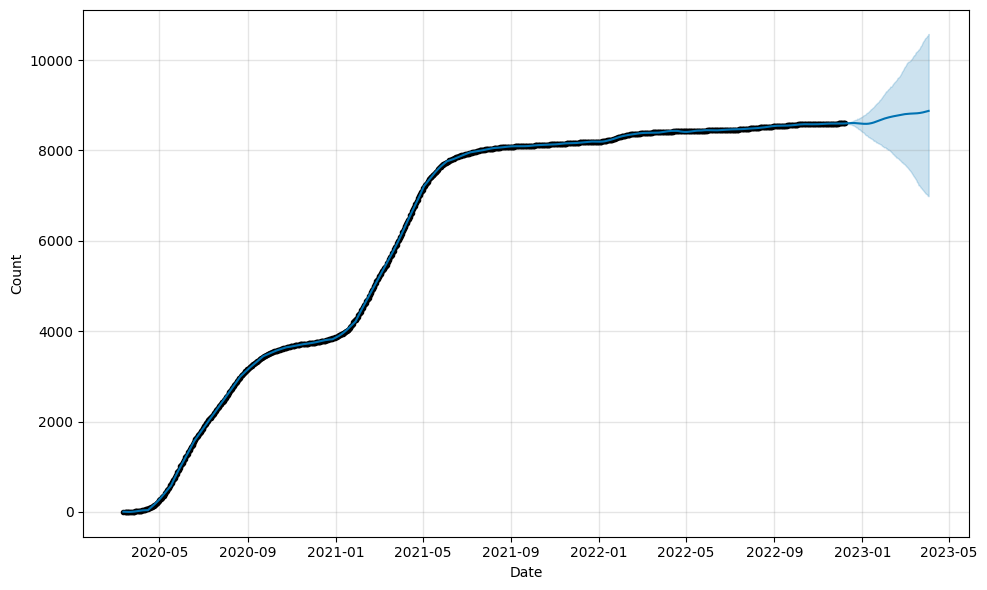

In [43]:
fig1 = m.plot(forecast, xlabel='Date', ylabel='Count')

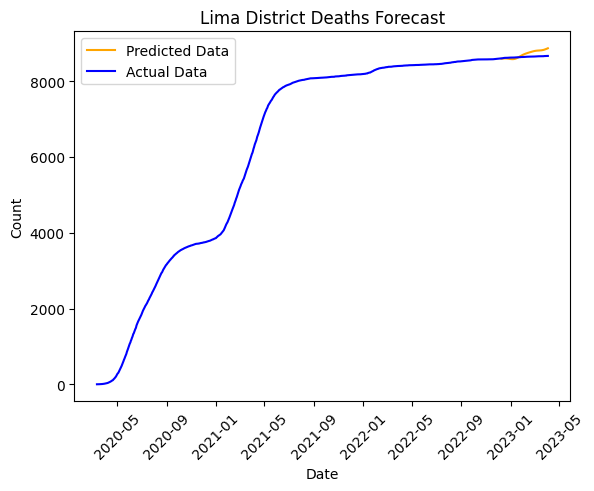

In [60]:
# Plot
plt.figure()
#forecast['actual_data'] = actual_data['y'].values
#fig1 = m.plot(forecast, xlabel='Date', ylabel='Value', c='blue')# The model is stored in the letter m and we plot and then we pass the forecast df
# Blue line represents your prediction or yhat value 
# Shaded blue regions represent your bounding boxes (yhat upper and lower)
# built-in
#fig1.gca().plot(actual_data['ds'], actual_data['y'], 'k.')
# Add the actual data of last 116 days to the curve 
# actual_data= df[1000:]
# print(actual_data)
plt.plot(predict_data[['ds']], predict_data[['yhat']], c='orange', label='Predicted Data')
plt.plot(df[['ds']], df[['y']], c='blue', label='Actual Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima District Deaths Forecast")
plt.legend()
plt.show()

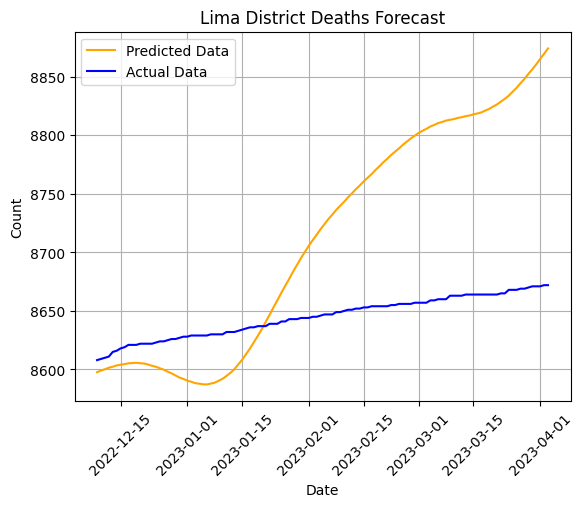

In [58]:
plt.figure()
plt.plot(predict_data[['ds']], predict_data[['yhat']], c='orange', label='Predicted Data')
plt.plot(actual_data[['ds']], actual_data[['y']], c='blue', label='Actual Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima District Deaths Forecast")
plt.legend()
plt.grid()
plt.show()

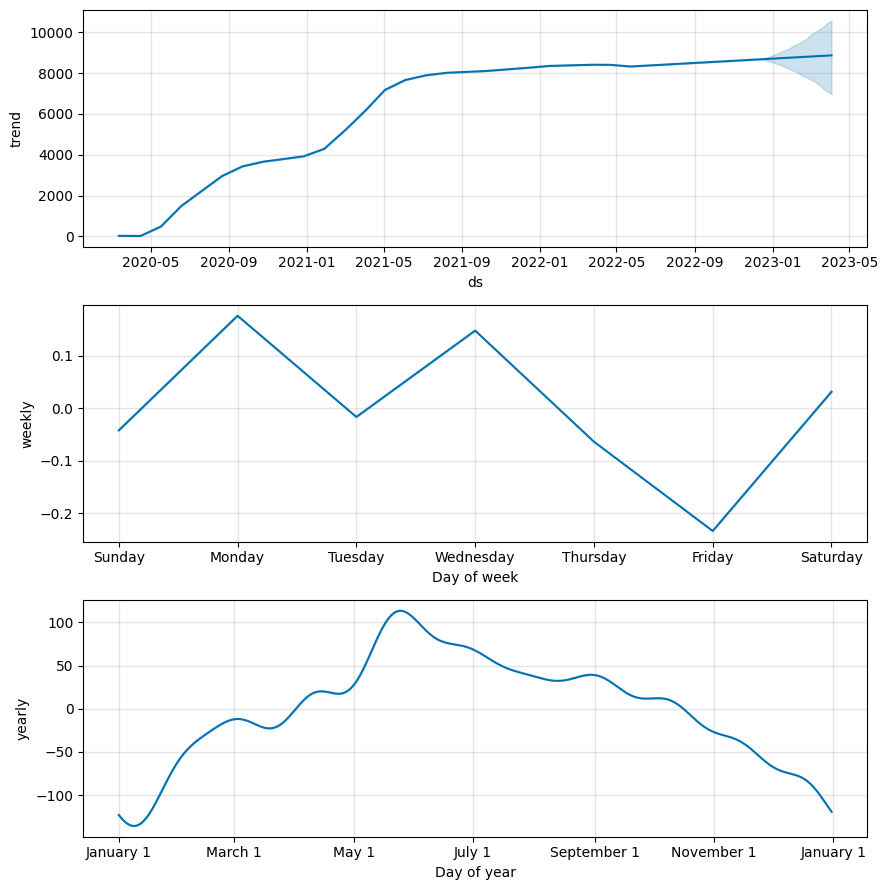

In [56]:
# If you want to see the forecast components, you can use the Prophet.plot_components method. 
# By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 
# If you include holidays, you’ll see those here, too.
fig2 = m.plot_components(forecast) # This is the decomposition of the trend
# This gives a lot of information on the trends (daily, weekly or seasonally)
# The overall trend is downwards with an upwards end ( From the beginning of 2021 until the end of 2022 it was a downwards trend)
# Weekly, nearly nothing happend if you see the numbers in y axis
# Yearly, during the first quarter you can see more activity then it lowers


In [57]:
# Prophet Lima District Error Calculation (Deaths)
# Evaluating the model performance
mae = mean_absolute_error(actual_data[['y']], predict_data[['yhat']])
mse = mean_squared_error(actual_data[['y']], predict_data[['yhat']])
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

mean_actual = actual_data[['y']].mean()[0]
print(mean_actual)
print(f"RMSE percentage: {(rmse/actual_data[['y']].mean()[0]*100)}%")

MAE: 85.29160320973787
MSE: 11096.267054791002
RMSE: 105.33882026485298
8644.724137931034
RMSE percentage: 1.2185330449429936%


In [173]:
import numpy as np

# Splitting the data into training and testing sets
train = df_first_1000[:-116]
test = df_first_1000[-116:] # Last 200 days used as test


In [174]:
# Fitting the Prophet model to the training data
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8f02zuf/weg14jta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8f02zuf/tcw8s903.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62544', 'data', 'file=/tmp/tmpb8f02zuf/weg14jta.json', 'init=/tmp/tmpb8f02zuf/tcw8s903.json', 'output', 'file=/tmp/tmpb8f02zuf/prophet_modellu58mjsu/prophet_model-20230427071654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [175]:
# Making predictions on the test data
future = model.make_future_dataframe(periods=100, freq='D')
forecast = model.predict(future)[-200:]

In [176]:
# # Alternative after fitting
# # Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 
# # You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. 
# # By default it will also include the dates from the history, so we will see the model fit as well.
# future = m.make_future_dataframe(periods=365)
# future.tail()

In [177]:
# # An interactive figure of the forecast and components can be created with plotly. 
# # You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. 
# # You will also need to install the notebook and ipywidgets packages.
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(m, forecast)
# plot_components_plotly(m, forecast)

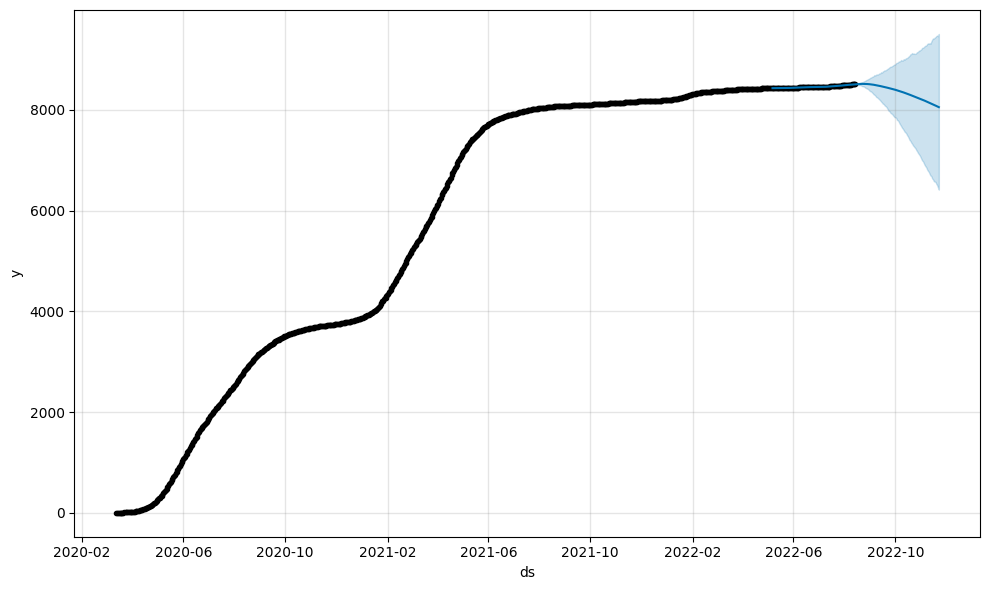

In [178]:
# Visualizing the results
fig = model.plot(forecast)

In [179]:
print(len(df['ds'])*0.20) # 223 days

223.20000000000002


In [180]:
# Splitting the data into training and testing sets
train = df[:-223]
test = df[-223:] # Last 223 days used as test


In [181]:
# Fitting the Prophet model to the training data
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8f02zuf/fo94pmuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8f02zuf/og0ijqlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11715', 'data', 'file=/tmp/tmpb8f02zuf/fo94pmuw.json', 'init=/tmp/tmpb8f02zuf/og0ijqlp.json', 'output', 'file=/tmp/tmpb8f02zuf/prophet_modeloqqf8ouu/prophet_model-20230427071655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [182]:
# Making predictions on the test data
future = model.make_future_dataframe(periods=223, freq='D')
forecast = model.predict(future)[-223:]

In [183]:
# Evaluating the model performance
print(test.mean()[0])
mae = mean_absolute_error(test['y'], forecast['yhat'])
mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

print(f'percentage error = ',(rmse/test.mean()[0])*100)

8608.735426008969
MAE: 603.5214025879181
MSE: 478193.99634408246
RMSE: 691.5157238588885
percentage error =  8.032721295739448


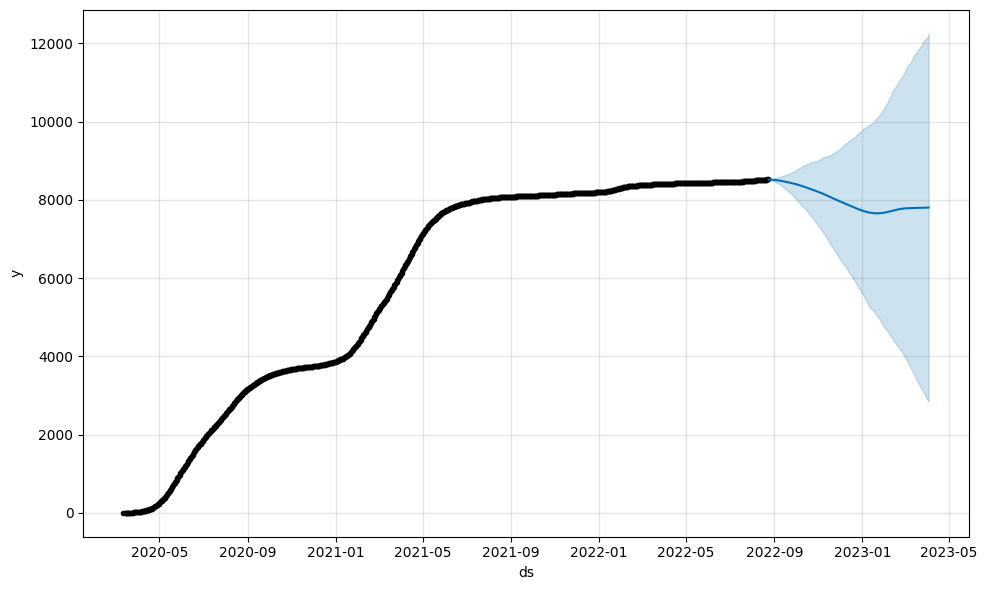

In [184]:
# Visualizing the results
fig = model.plot(forecast)

In [31]:
# Calculate MAPE for the Lima district (Deaths)

# Filter actual and predicted values from forecast dataframe
actual = df['y'].values[-223:]
predicted = forecast['yhat'].values[:len(actual)]

# Calculate MAPE
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print('MAPE for the Lima district (Deaths): {:.2f}%'.format(mape))

MAPE for the Lima district (Deaths): 79.16%
